# Neutron Monitor Database (NMDB) Access Data V1

In [163]:
import requests
import xarray as xr
import pandas as pd
import os
import zipfile
import urllib
from bs4 import BeautifulSoup
import numpy as np
import math
import matplotlib.pyplot as plt

In [164]:
def nmdb_get(startdate, enddate, station="JUNG"):
    sy,sm,sd = str(startdate).split("-")
    ey,em,ed = str(enddate).split("-")
    url = "http://nest.nmdb.eu/draw_graph.php?formchk=1&stations[]={station}&tabchoice=1h&dtype=corr_for_efficiency&tresolution=60&force=1&yunits=0&date_choice=bydate&start_day={sd}&start_month={sm}&start_year={sy}&start_hour=0&start_min=0&end_day={ed}&end_month={em}&end_year={ey}&end_hour=23&end_min=59&output=ascii&display_null=1"
    url = url.format(station=station, sd=sd, sm=sm, sy=sy, ed=ed, em=em, ey=ey)
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, features="html.parser")
    pre = soup.find_all('pre')
    pre = pre[0].text
    pre = pre[pre.find('start_date_time'):]
    pre = pre.replace("start_date_time   1HCOR_E", "")
    f = open("tmpV1.txt", "w")
    f.write(pre)
    f.close()
    df = open("tmpV1.txt", "r")
    lines = df.readlines()
    df.close()
    lines = lines[1:]
    dfneut = pd.DataFrame(lines)
    dfneut = dfneut[0].str.split(";", n = 2, expand = True)
    cols = ['DATE', 'COUNT']
    dfneut.columns = cols
    dates = pd.to_datetime(dfneut['DATE'])
    values = dfneut['COUNT']
    
    dfdict = dict(zip(dates,values))

    return dfdict

In [165]:
data0 = nmdb_get("2015-10-01", "2019-10-01", "JUNG")

In [166]:
data1 = list(data0.items())
data_array = np.array(data1)

In [167]:
df = pd.DataFrame(data_array)
df.columns =['Dates', 'Values']
df = df.replace('   null\n',np.nan, regex=True)
df = df.replace('\n','', regex=True)

In [168]:
df.head()

,Dates,Values
0,2015-10-01 00:00:00,155.953
1,2015-10-01 01:00:00,156.033
2,2015-10-01 02:00:00,156.295
3,2015-10-01 03:00:00,155.664
4,2015-10-01 04:00:00,155.470


In [169]:
display(df)

,Dates,Values
0,2015-10-01 00:00:00,155.953
1,2015-10-01 01:00:00,156.033
2,2015-10-01 02:00:00,156.295
3,2015-10-01 03:00:00,155.664
4,2015-10-01 04:00:00,155.470
...,...,...
35083,2019-10-01 19:00:00,167.388
35084,2019-10-01 20:00:00,167.596
35085,2019-10-01 21:00:00,166.891
35086,2019-10-01 22:00:00,166.706


In [170]:
from datetime import datetime

In [171]:
df['Dates'] = df['Dates'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
x = df['Dates']
y = df['Values']

In [172]:
df.to_csv('JUNG20151001to20191001.txt', header=True, index=False, sep='\t', mode='w+', na_rep='NaN')

# --------------------------------------------------------------------

In [173]:
import matplotlib.pyplot as plt  # Display figures inline in Jupyter notebook
import seaborn as sns            # Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.dates as mdates

df['Datetime'] = pd.to_datetime(df['Dates'])
df.set_index('Datetime', inplace=True)
del df['Dates']
df.head()

,Values
Datetime,
2015-10-01 00:00:00,155.953
2015-10-01 01:00:00,156.033
2015-10-01 02:00:00,156.295
2015-10-01 03:00:00,155.664
2015-10-01 04:00:00,155.470


Text(0.5, 0, 'Date')

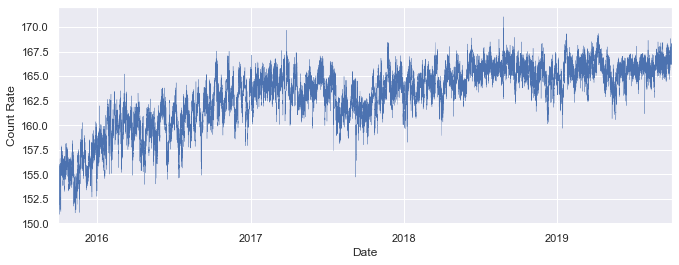

In [178]:
df['Values'] = df["Values"].astype(float)
ax = df['Values'].plot(linewidth=0.3)
ax.set_ylabel('Count Rate')
ax.set_xlabel('Date')